[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[12439.00825  12796.778625 10772.778375  4481.88125   2438.103125
  1436.9425     922.571875   661.491      486.17225 ]


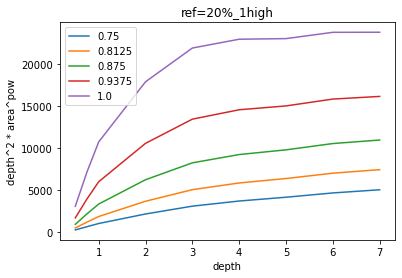

[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[17976.45575  21327.9225   20940.414375 13627.818125  7917.733375
  4897.193875  3185.28025   2390.628875  1798.484   ]


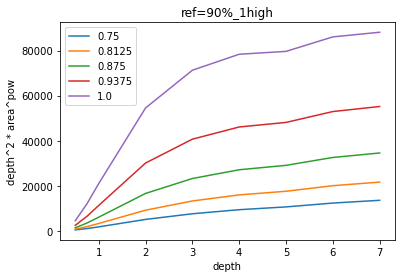

[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[11990.612875 12188.2795   10091.5255    4388.024875  2256.87625
  1305.54875    870.034625   605.422      446.258125]


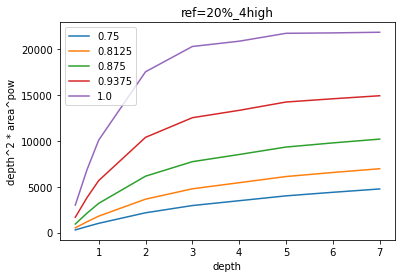

[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[17419.759    20461.66175  19545.9375   12179.21075   7063.816375
  4405.660625  2964.169375  2096.9885    1603.744625]


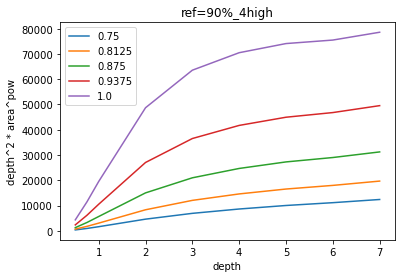

[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[2732.966875 1355.814     769.545625  160.771375   72.743      38.94075
   23.145875   16.013625   10.38    ]


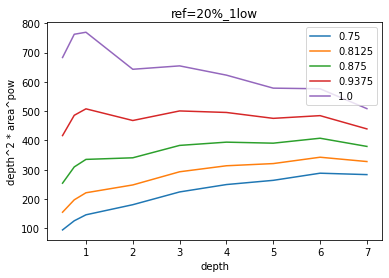

[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[5695.21475  3800.2325   2090.963     582.163     258.554125  145.190625
   83.31475    61.4285     44.460875]


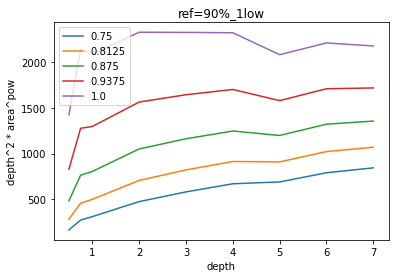

[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[2761.01475  1328.708     766.5545    162.117875   75.899625   37.39975
   23.561375   17.01375    11.80925 ]


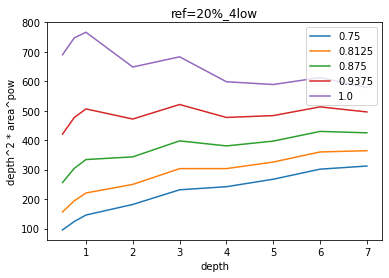

[0.5  0.75 1.   2.   3.   4.   5.   6.   7.  ]
[5649.248    3609.2545   2108.913625  562.533875  250.454625  144.06
   85.2155     61.359      44.029125]


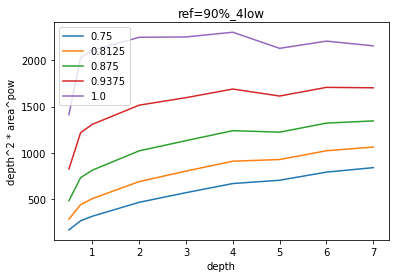

In [9]:
import numpy as np
from cam2_read_area_draw_fig import read_csv_draw
from utils import draw_pic
import pylab


def try_poly(x, y, power_num=2):
    z = np.polyfit(x, y, power_num)
    p1 = np.poly1d(z)
    return p1


# (Ref) / dis = F(Area)
def polyfit_area(csv_path, ref, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    formula_area = try_poly(area, ref/depth, power_num=1)
    y_truth = ref/depth
    y_pred = formula_area(area)
    loss = abs(y_truth-y_pred)
    print(loss)


# (dis**2) * area
def show_dis_square_area(csv_path, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    print(depth)
    module_list = ["1high", "4high", "1low", "4low"]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    print(area)
    # draw_pic(depth, area * (depth**1/2), xlabel="depth", ylabel="area*depth**1/2", title=module_list[module], fig=False)
    # draw_pic(depth, area * depth, xlabel="depth", ylabel="area*depth", title=module_list[module], fig=False)
    # draw_pic(depth, area * (depth**3/2), xlabel="depth", ylabel="area*depth**3/2", title=module_list[module], fig=False)
    # draw_pic(depth, area * (depth**2), xlabel="depth", ylabel="area*depth**2", title=module_list[module], fig=True)
    # draw_pic(depth, (area**2)*depth, xlabel="depth", ylabel="(area**2)*depth", title=module_list[module])
    range_area = np.linspace(0.75,1,5)
    for i in range_area:
        plot = pylab.plot(depth, (area**i)*(depth**2))
    # pylab.yscale('log') 
    title = "ref="+str(csv_path)[-11:-8]+"_"+module_list[module]   
    pylab.title(title)
    pylab.legend(range_area)
    pylab.xlabel("depth")
    pylab.ylabel("depth^2 * area^pow")
    pylab.grid(which="minor")
    pylab.show()

if __name__ == "__main__":
    csv20_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_rect_area_20%_all.csv" 
    csv90_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_rect_area_90%_all.csv"
    
    for i in range(4):
        show_dis_square_area(csv20_path, i)
        show_dis_square_area(csv90_path, i)
    # polyfit_area(csv20_path, 0.2, 0)
    # polyfit_area(csv90_path, 0.9, 0)

[1.26833914 0.9426079  0.54563436 0.29095085 0.16736027 0.03899205
 0.0472306  0.09735863 0.13281083]


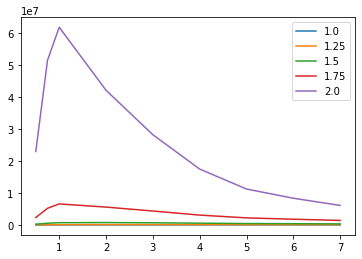

[2.29074618 0.32921848 1.04666455 0.82023153 0.34048299 0.08850685
 0.0538794  0.11607427 0.16440456]


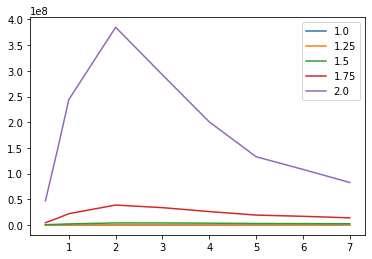

In [31]:
import numpy as np
from cam2_read_area_draw_fig import read_csv_draw
from utils import draw_pic
import pylab

def try_poly(x, y, power_num=1):
    z = np.polyfit(x, y, power_num)
    p1 = np.poly1d(z)
    return p1


# (Ref) / dis = F(Area)
def polyfit_area(csv_path, ref, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    formula_area = try_poly(area, ref/(depth**2), power_num=2)
    y_truth = ref/(depth**2)
    y_pred = formula_area(area)
    loss = abs(y_truth-y_pred)
    print(loss)
    # plot1 = pylab.plot(area, y_truth, '*', label='original values')
    # plot2 = pylab.plot(area, y_pred, 'r', label='fit values')
    # pylab.xlabel("area")
    # pylab.ylabel("ref/(depth**2)")
    
    # plot1 = pylab.plot(depth, area)
    # plot2 = pylab.plot(depth, area*depth)
    # plot3 = pylab.plot(depth, area*depth*depth, "o")
    # plot3 = pylab.plot(depth, area*depth**(1/2), "*")
    # plot3 = pylab.plot(depth, area*depth**(3/2), )
    # plot3 = pylab.plot(depth, area*depth**(8/5), )
    # plot3 = pylab.plot(depth, area*depth**(89/50), )
    # plot3 = pylab.plot(depth, area*depth**(4/3), )
    # pylab.legend(["area", "area*depth", 
    #               "area*depth*depth", 
    #               "area*depth**(1/2)", "area*depth**(3/2)", 
    #               "area*depth**(8/5)", "area*depth**(9/5)",
    #               "area*depth**(4/3)"
    # ])
    range_area = np.linspace(1,2,5)
    for i in range_area:
        plot3 = pylab.plot(depth, (area**i)*(depth**2))
    pylab.legend(range_area)
    pylab.show()


# (dis**2) * area
def show_dis_square_area(csv_path, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    module_list = ["1high", "4high", "1low", "4low"]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    y = area * (depth**2)
    x = depth
    draw_pic(x, y, xlabel="depth", ylabel="area*depth^2", title=module_list[module])    


if __name__ == "__main__":
    csv20_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area2_20%_all.csv" 
    csv90_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area2_90%_all.csv"
    
    polyfit_area(csv20_path, 1, 0)
    polyfit_area(csv90_path, 1, 0)

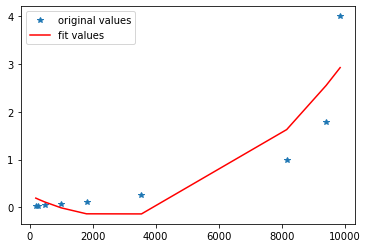

In [2]:
import numpy as np
from cam2_read_area_draw_fig import read_csv_draw
from utils import draw_pic
import pylab

def try_poly(x, y, power_num=1):
    z = np.polyfit(x, y, power_num)
    p1 = np.poly1d(z)
    return p1


# (Ref) / dis = F(Area)
def polyfit_area(csv_path, ref=1, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    y_truth = ref/(depth**2)
    z = np.polyfit(area, y_truth, 2)
    p1 = np.poly1d(z)
    y_pred = p1(area)
    # loss = abs(y_truth-y_pred)
    # print(loss)
    plot1 = pylab.plot(area, y_truth, '*')
    plot2 = pylab.plot(area, y_pred, 'r')
    pylab.legend(['original values', 'fit values'])
    pylab.show()

# (dis**2) * area
def show_dis_square_area(csv_path, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    module_list = ["1high", "4high", "1low", "4low"]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    y = area * (depth**2)
    x = depth
    draw_pic(x, y, xlabel="depth", ylabel="area*depth^2", title=module_list[module])    


if __name__ == "__main__":
    csv20_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area_20%_all.csv" 
    csv90_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area_90%_all.csv"
    
    polyfit_area(csv20_path, 1, 0)
    # polyfit_area(csv90_path, 0.9, 0)

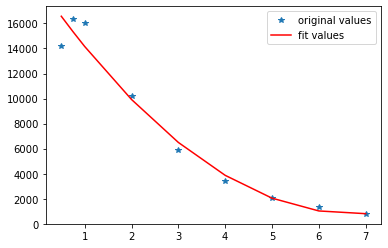

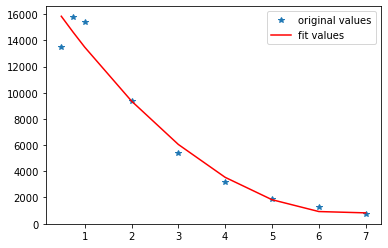

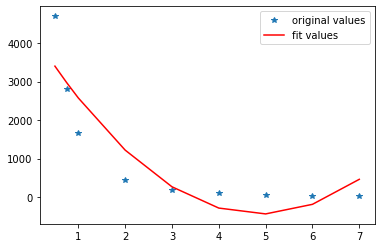

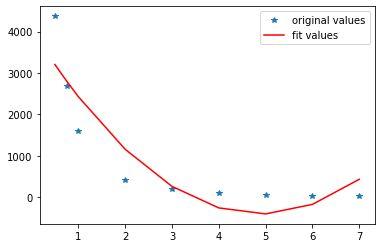

In [62]:
import numpy as np
from cam2_read_area_draw_fig import read_csv_draw
from utils import draw_pic
import pylab


# (Ref) / dis = F(Area)
def polyfit_dep2area(csv_path, ref=1, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    z = np.polyfit(depth, area, 2)
    p1 = np.poly1d(z)
    y_pred = p1(depth)
    pylab.plot(depth, area, '*')
    pylab.plot(depth, y_pred, 'r')
    pylab.legend(['original values', 'fit values'])
    pylab.show()
    
    # z = np.polyfit(depth_list, area_list, 2)
    # p1 = np.poly1d(z)                    # 返回值为多项式的表达式，也就是函数式子
    # # print(p1)
    # y_pred = p1(depth_list) 


if __name__ == "__main__":
    csv20_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area_20%_all.csv" 
    csv90_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area_90%_all.csv"
    
    for i in range(4):
        polyfit_dep2area(csv90_path, 1, i)

[1. 2. 3. 4. 5. 6. 7.]
[7861.3380625 3244.053625  1770.0894375 1044.6628125  670.0958125
  481.449375   352.80375  ]


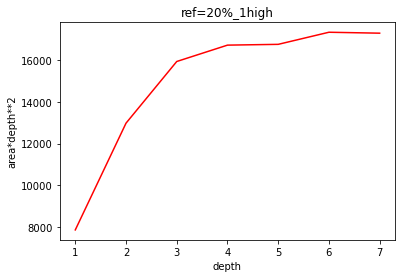

[1. 2. 3. 4. 5. 6. 7.]
[7400.06425   3214.3468125 1656.526625   957.2839375  639.1038125
  443.1169375  327.28575  ]


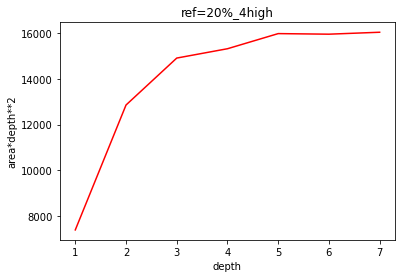

[1. 2. 3. 4. 5. 6. 7.]
[538.26875   108.080625   48.9699375  25.7233125  15.953875   10.882875
   7.0036875]


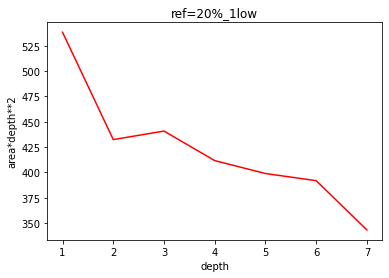

[1. 2. 3. 4. 5. 6. 7.]
[507.918625  116.2476875  55.40925    27.5975625  17.67325    12.8565625
   8.8479375]


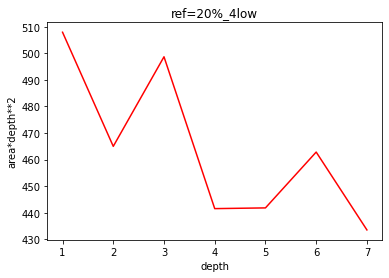

[1. 2. 3. 4. 5. 6. 7.]
[15622.6764375  9809.697625   5697.5145     3540.6775625  2304.373375
  1732.709      1298.90875  ]


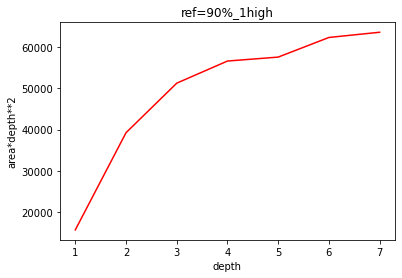

[1. 2. 3. 4. 5. 6. 7.]
[14523.092875   8856.536875   5149.7010625  3219.4116875  2169.7091875
  1534.5955625  1173.123375 ]


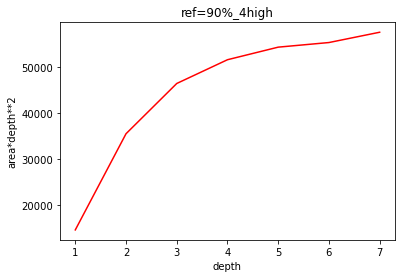

[1. 2. 3. 4. 5. 6. 7.]
[1516.4336875  410.9355625  175.324875    99.9378125   55.6328125
   42.622625    31.6330625]


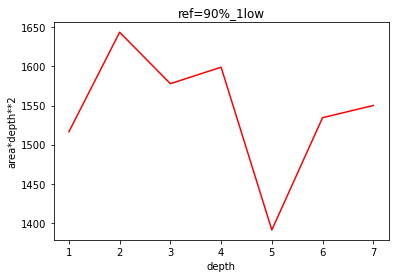

[1. 2. 3. 4. 5. 6. 7.]
[1406.824      391.4053125  179.586375   102.6488125   61.328625
   44.744375    32.0213125]


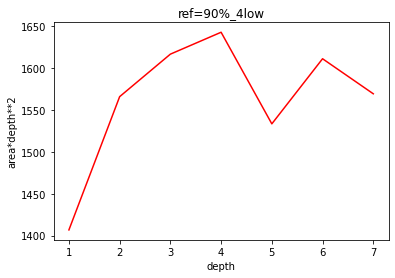

In [34]:
import numpy as np
from cam2_read_area_draw_fig import read_csv_draw
from utils import draw_pic
import pylab


def try_poly(x, y, power_num=2):
    z = np.polyfit(x, y, power_num)
    p1 = np.poly1d(z)
    return p1


# (Ref) / dis = F(Area)
def polyfit_area(csv_path, ref, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0]
    area = depth_area[module+1] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    formula_area = try_poly(area, ref/depth, power_num=1)
    y_truth = ref/depth
    y_pred = formula_area(area)
    loss = abs(y_truth-y_pred)
    print(loss)


# (dis**2) * area
def show_dis_square_area(csv_path, module=0):
    depth_area = read_csv_draw(csv_path)
    depth = depth_area[0][-7:]
    print(depth)
    module_list = ["1high", "4high", "1low", "4low"]
    area = depth_area[module+1][-7:] # module=0,1,2,3 ["1high", "4high", "1low", "4low"]
    print(area)

    draw_pic(depth, area * (depth**2), xlabel="depth", ylabel="area*depth**2", title="ref="+str(csv_path)[-11:-8]+"_"+module_list[module], fig=True)
    return area

if __name__ == "__main__":
    # csv20_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_raw_hist_area2_10.0_20%_all.csv" 
    csv20_path2 = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area2_20%_all.csv"
    csv90_path = r"/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/peak_height_area2_90%_all.csv"
    
    area_list1 = []
    area_list2 = []
    for i in range(4):
        # show_dis_square_area(csv20_path, i)
        area_tmp1 = show_dis_square_area(csv20_path2, i)
        area_list1.append(area_tmp1)
    for i in range(4):
        area_tmp2 = show_dis_square_area(csv90_path, i)
        area_list2.append(area_tmp2)